 <div style="background-color: olive; padding: 40px; font-size: 40px;">

Data Wrangling: Acquisition & Preparation
</div>
    

Acquire a sample of data from SQL.
Identify null values, which nulls are 'deal-breakers', i.e. rows removed, which nulls should be represented by 0, and which should be replaced by a value from other methods, such as mean.
Identify outliers and decide what to do with them, if anything (remove, keep as-is, replace).
Data Structure: Aggregate as needed so that every row is an observation and each column is a variable (1 variable and not a measure).

In [23]:
import pandas as pd
import numpy as np
import wrangle_zillow as wz
import wrangle_mall as wm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Zillow

### Acquire and Summarize

Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:
# Fetch the Zillow data
zillow_data = wz.get_zillow_data()


## 2 Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [4]:
# Summarize the Zillow data
wz.summarize(zillow_data)


Shape of Data: 
(52319, 68)
Info: 
<class 'pandas.core.frame.DataFrame'>
Index: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquarefeet  

Outliers for Col calculatedfinishedsquarefeet:
lower:  -289.0 upper:  3863.0
16       3870.0
31       5492.0
33       4468.0
45       9586.0
51       5900.0
          ...  
52147    3864.0
52192    5280.0
52207    5655.0
52238    5350.0
52273    4175.0
Name: calculatedfinishedsquarefeet, Length: 2272, dtype: float64
----------
Outliers for Col finishedsquarefeet12:
lower:  -288.5 upper:  3867.5
16       3870.0
31       5492.0
33       4468.0
45       9586.0
51       5900.0
          ...  
52102    5945.0
52192    5280.0
52207    5655.0
52238    5350.0
52273    4175.0
Name: finishedsquarefeet12, Length: 2259, dtype: float64
----------
Outliers for Col finishedsquarefeet50:
lower:  223.5 upper:  2699.5
351       4677.0
352       5936.0
505       4459.0
851       3231.0
874       5010.0
          ...   
50753    12467.0
50916     3356.0
51480     3076.0
51731     5774.0
51754     3363.0
Name: finishedsquarefeet50, Length: 270, dtype: float64
----------
Outliers for Col finishedsquarefeet6

In [5]:
#  'zillow_data'
missing_summary = wz.missing_value_summary(zillow_data)


In [7]:
print(missing_summary)


| Attribute                    |   Num Rows Missing |   Pct Rows Missing |
|:-----------------------------|-------------------:|-------------------:|
| buildingclassdesc            |              52319 |       100          |
| buildingclasstypeid          |              52319 |       100          |
| finishedsquarefeet15         |              52319 |       100          |
| finishedsquarefeet13         |              52319 |       100          |
| storytypeid                  |              52272 |        99.9102     |
| basementsqft                 |              52272 |        99.9102     |
| storydesc                    |              52272 |        99.9102     |
| yardbuildingsqft26           |              52256 |        99.8796     |
| architecturalstyletypeid     |              52249 |        99.8662     |
| architecturalstyledesc       |              52249 |        99.8662     |
| typeconstructiondesc         |              52243 |        99.8547     |
| typeconstructiontypeid 

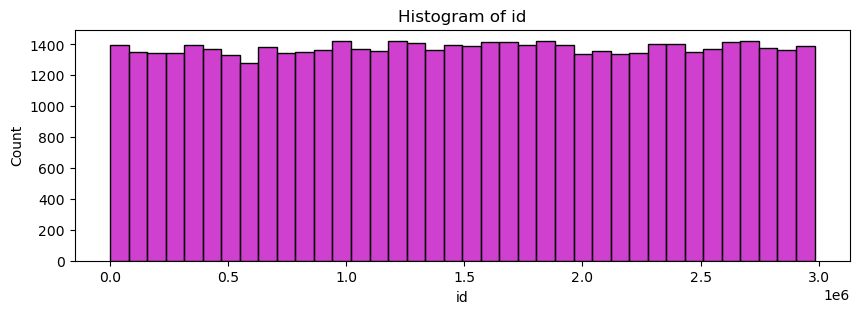

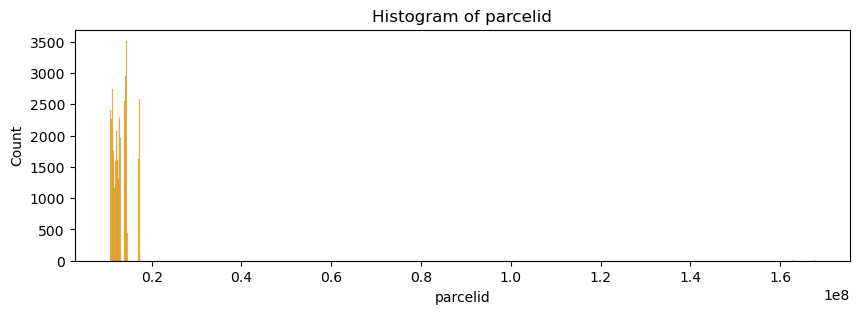

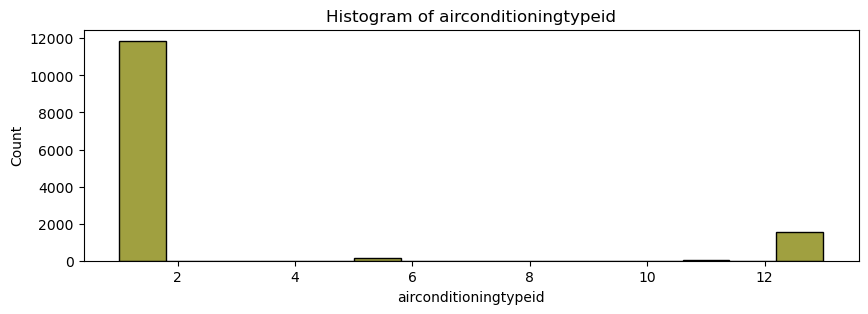

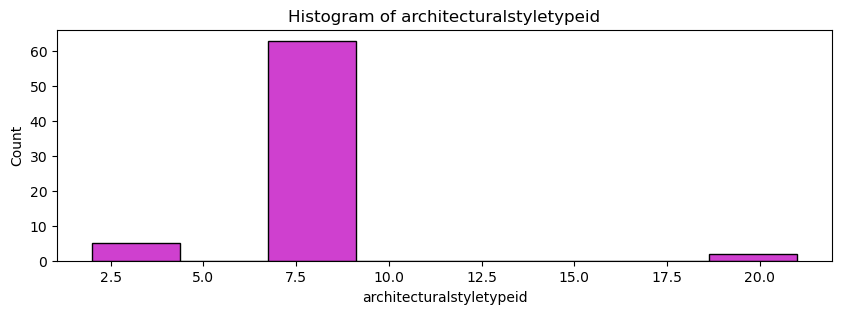

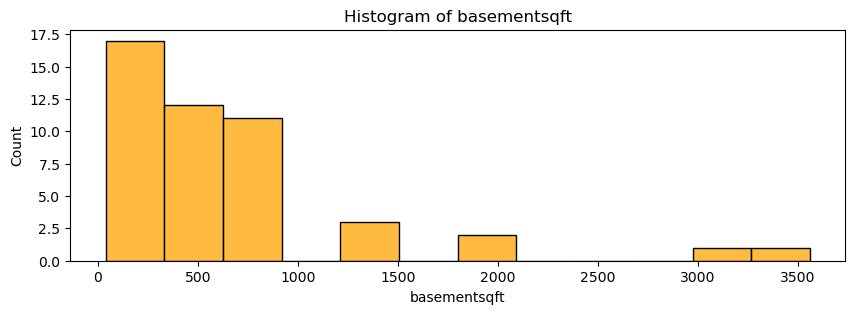

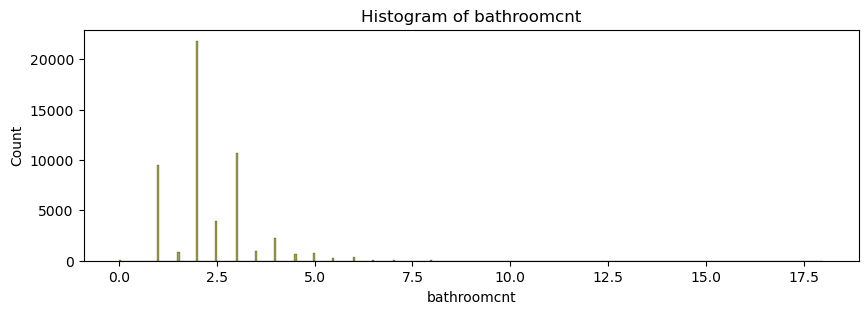

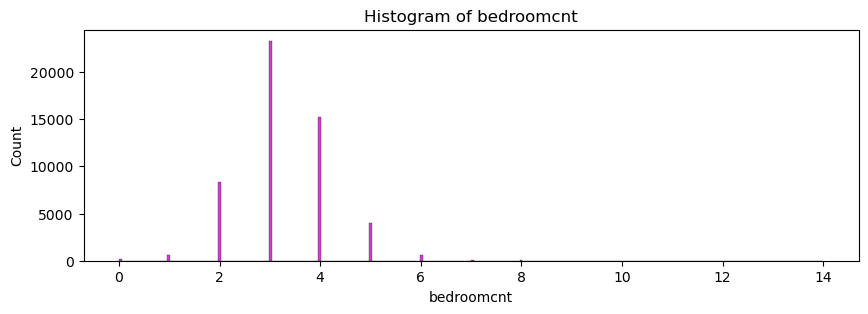

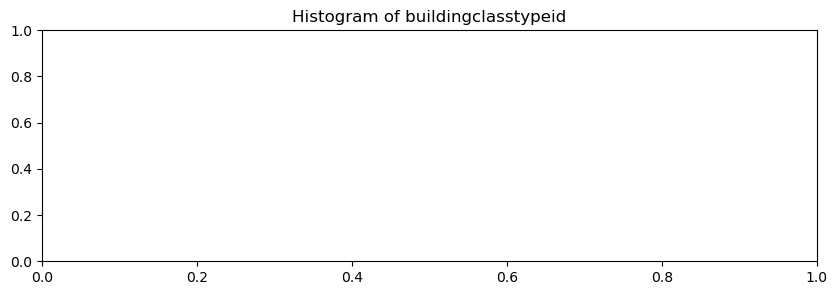

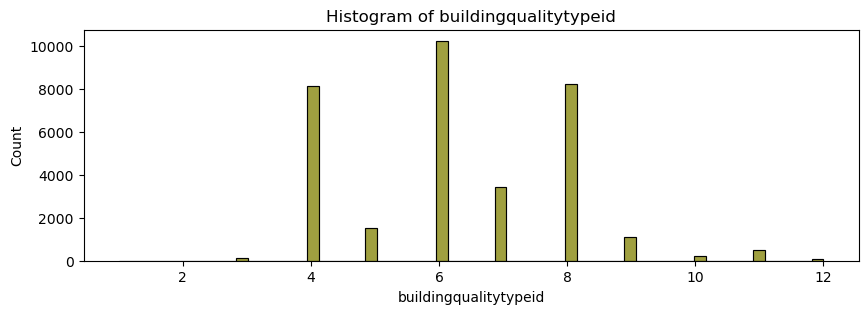

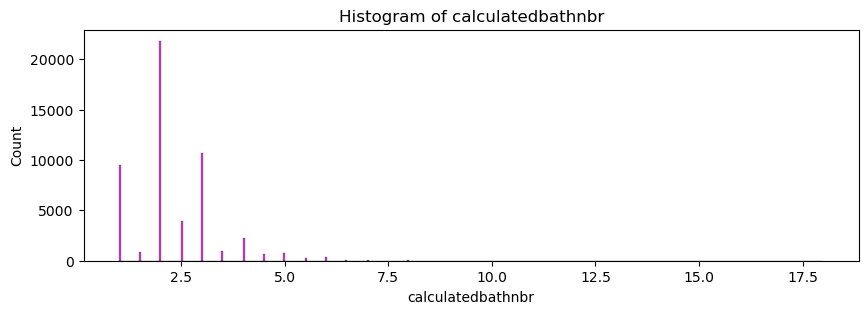

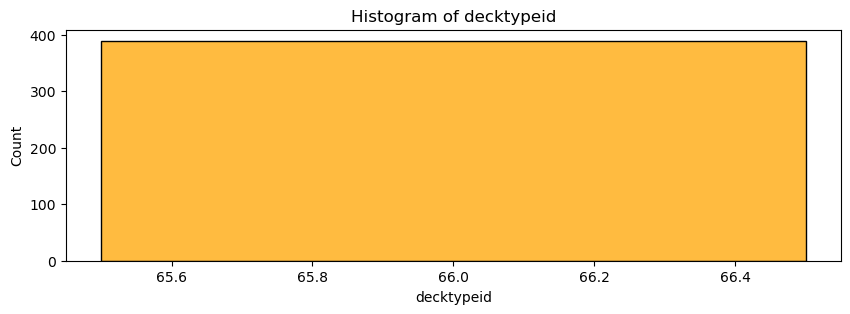

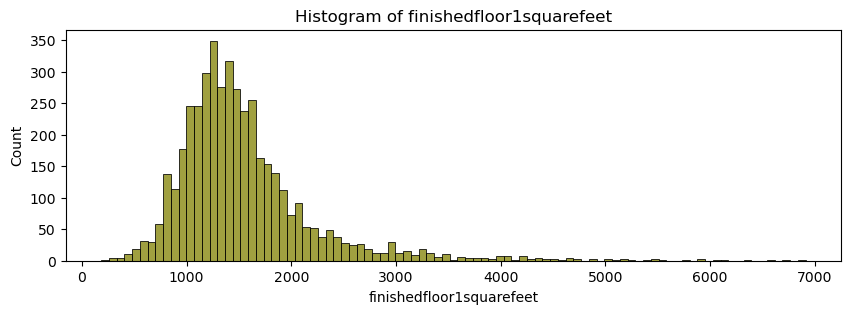

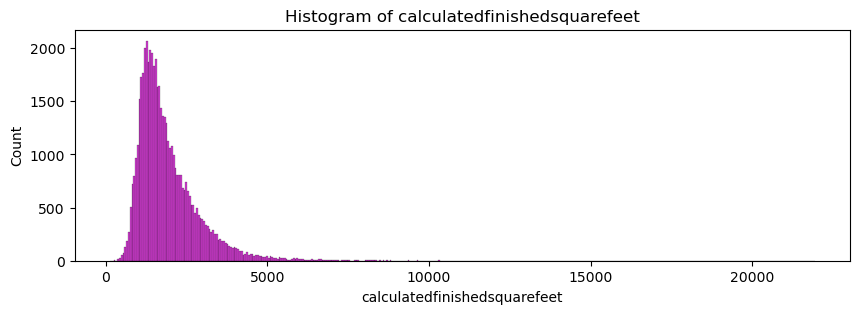

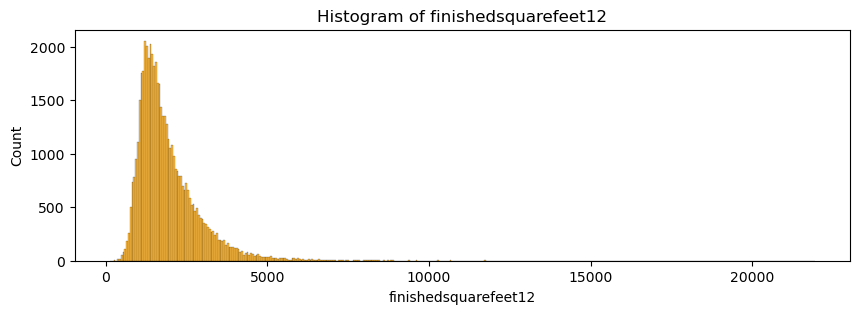

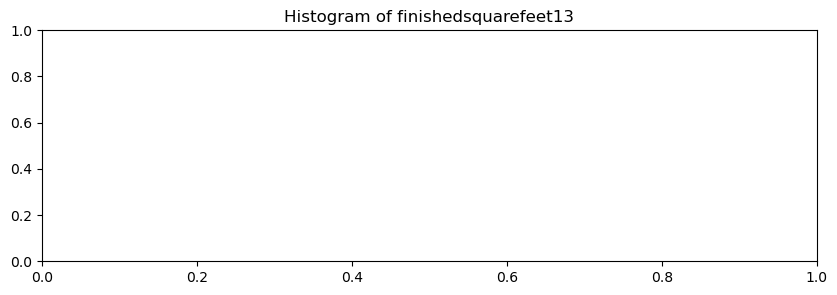

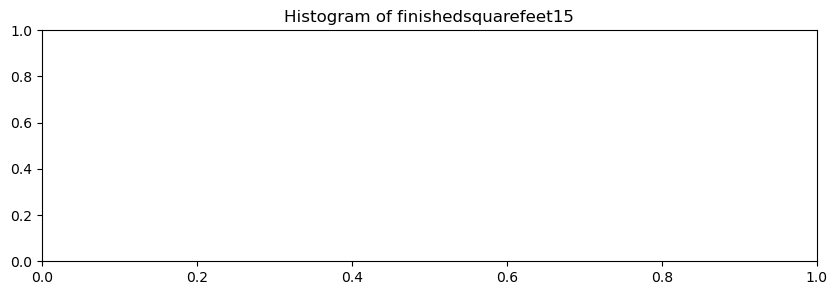

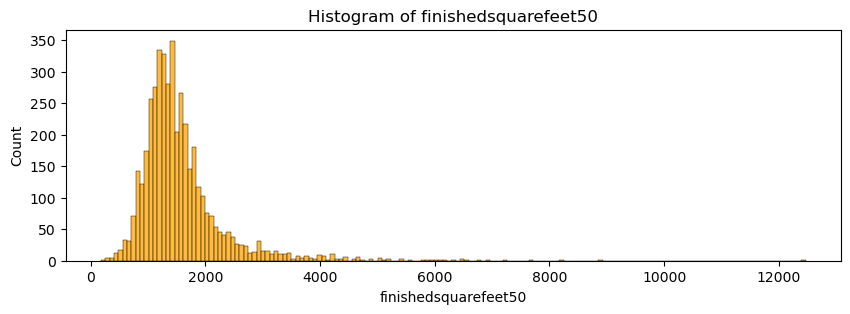

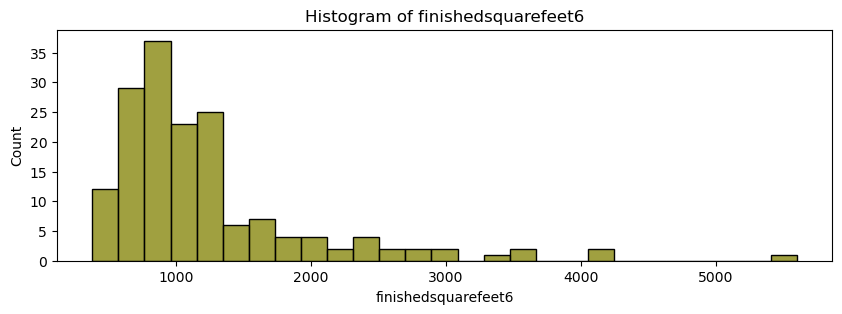

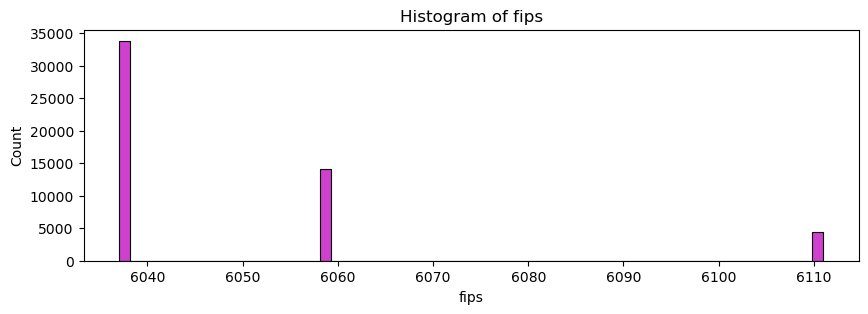

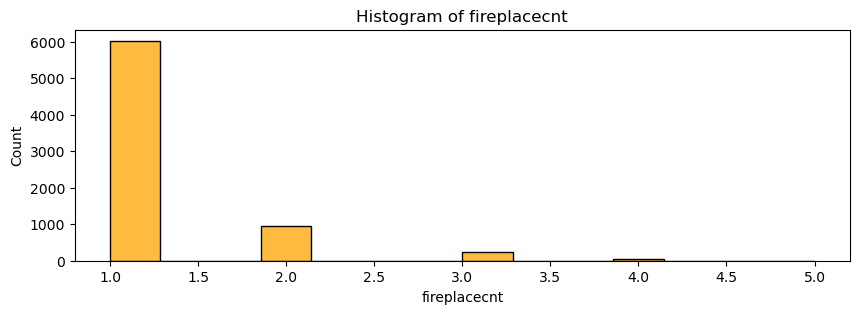

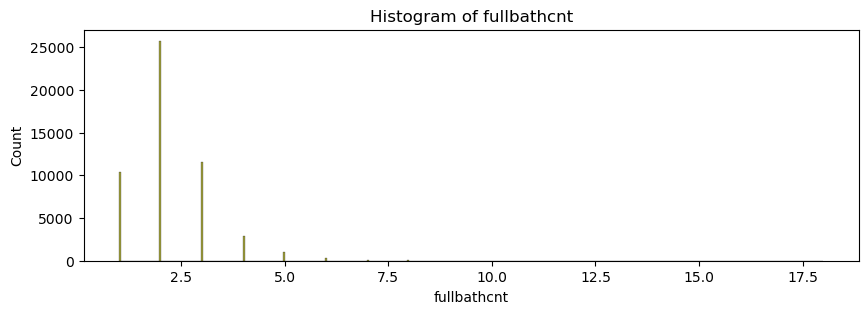

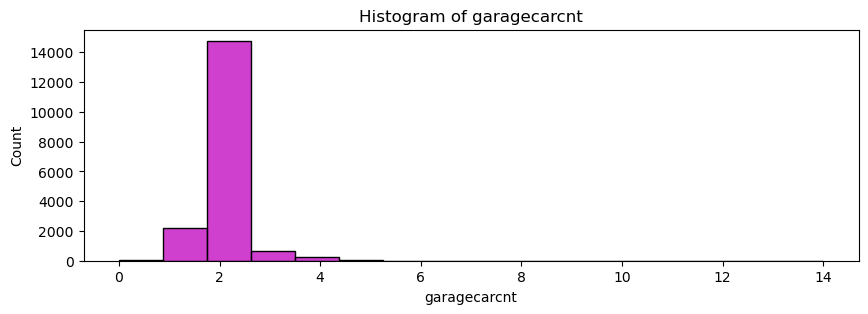

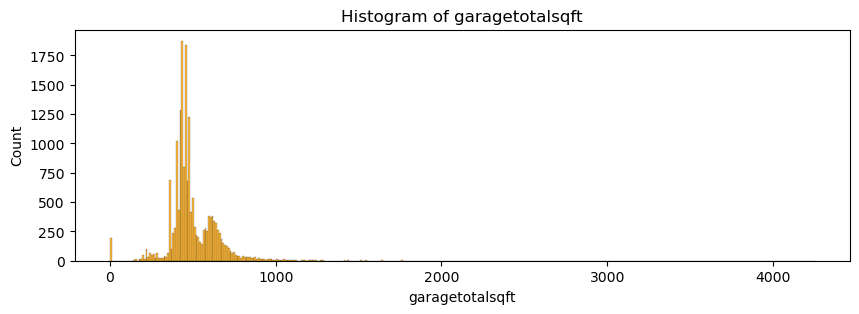

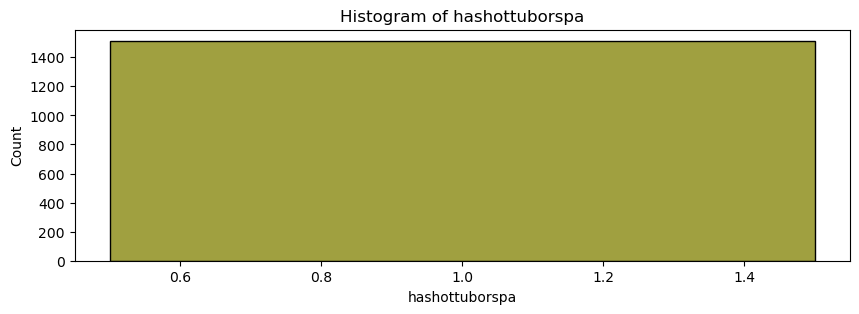

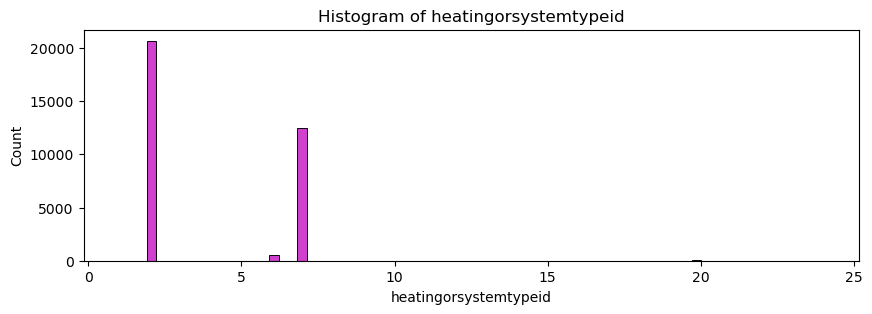

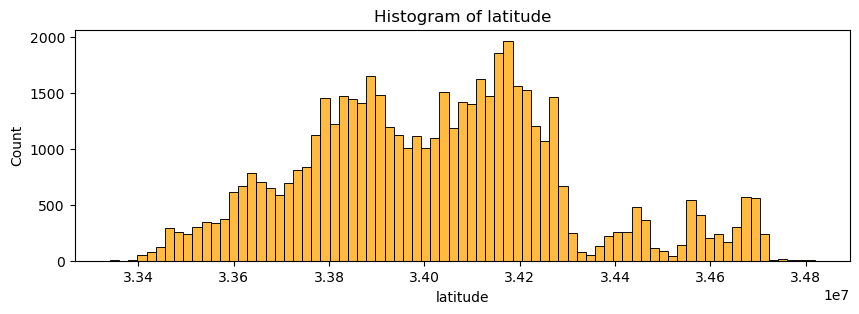

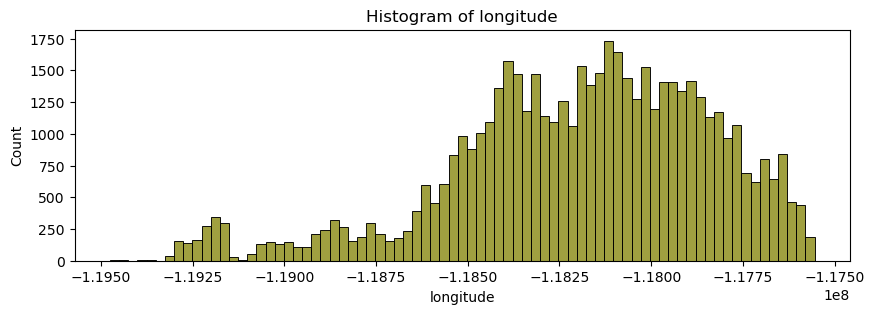

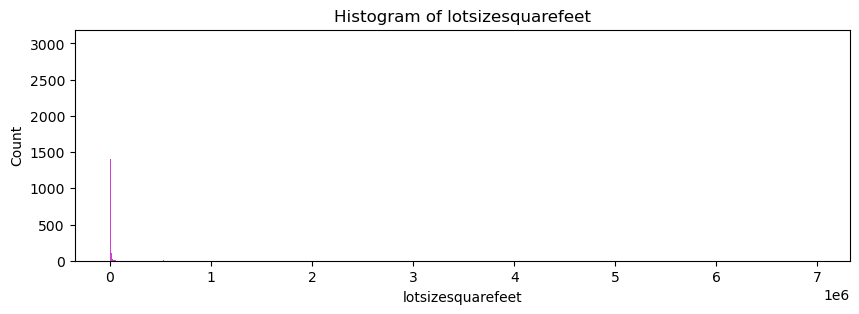

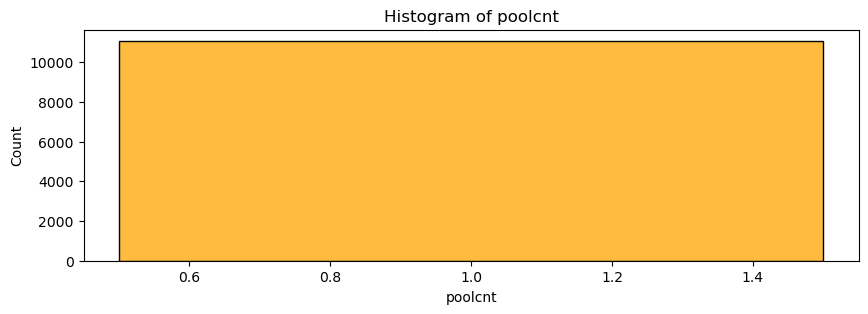

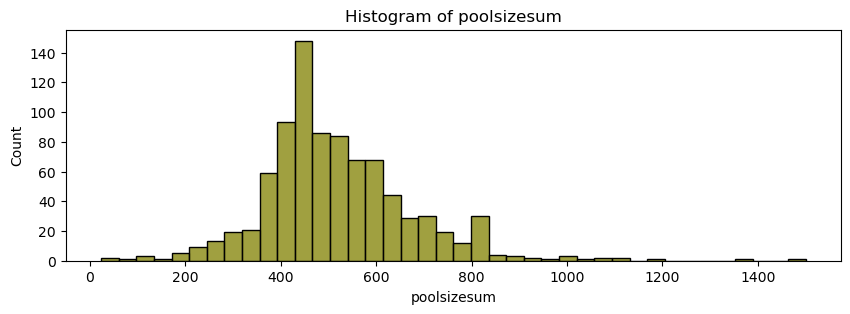

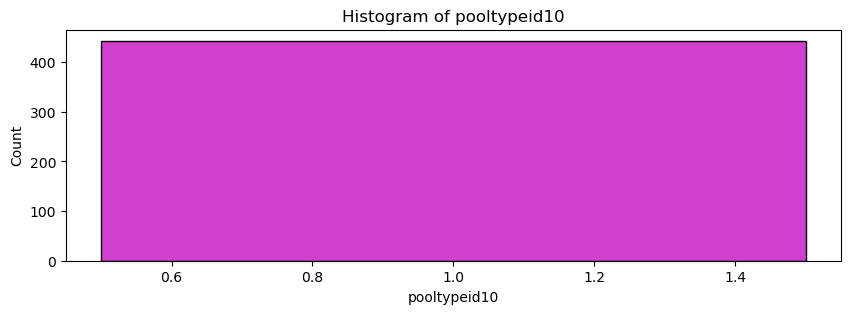

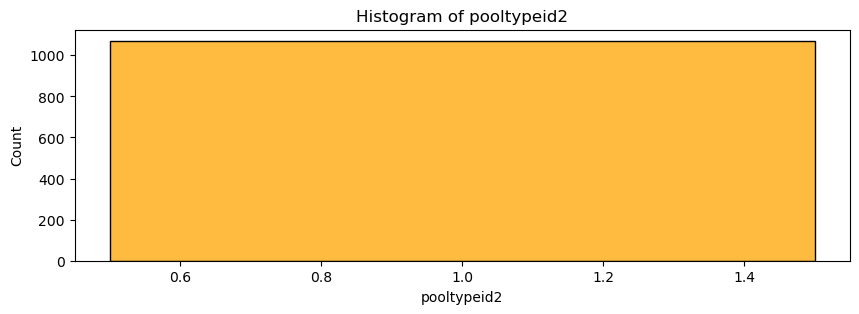

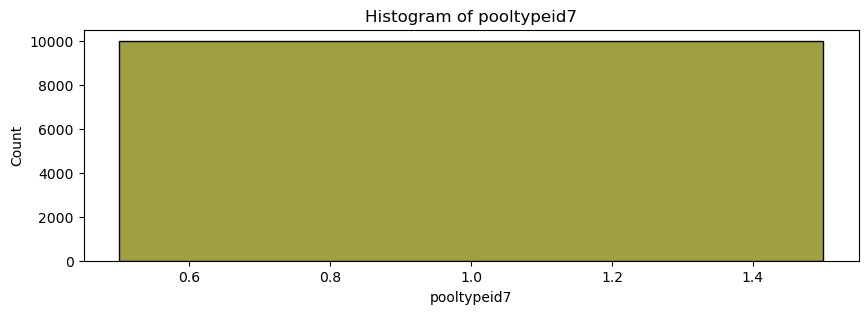

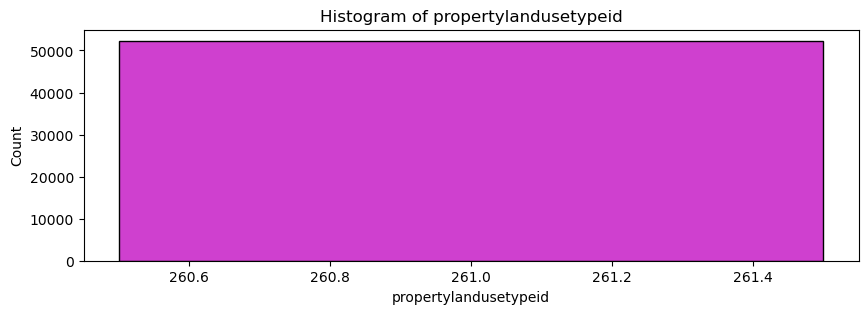

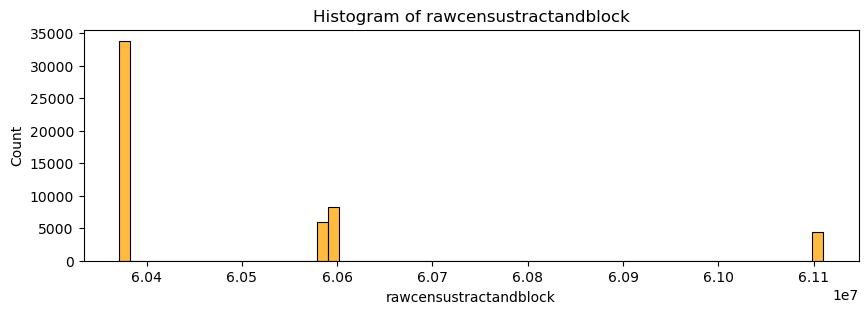

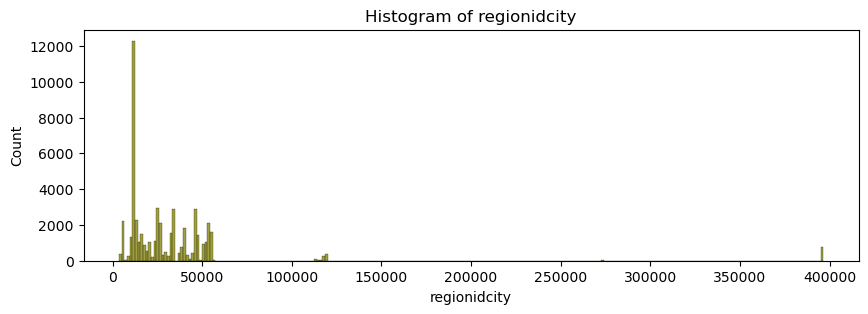

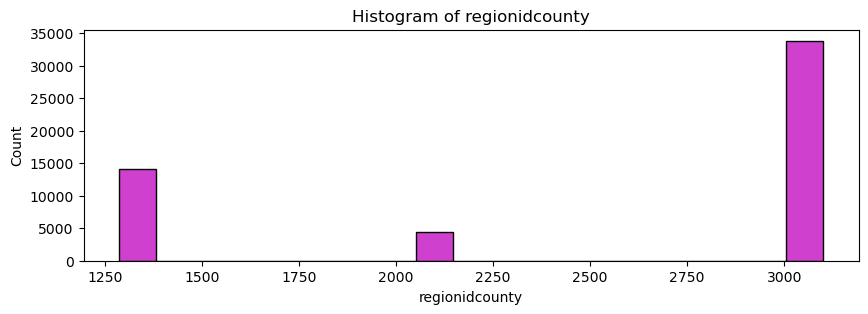

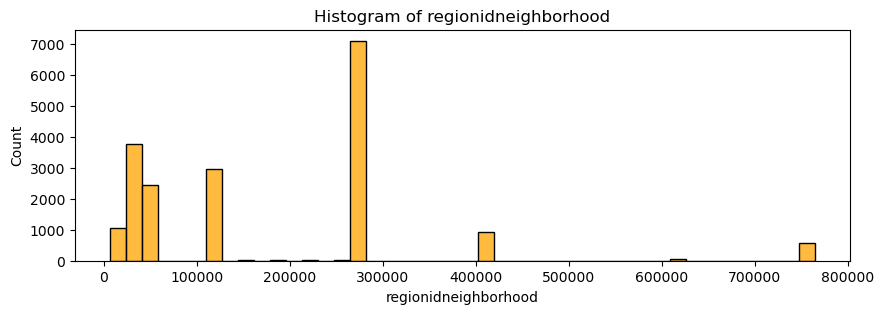

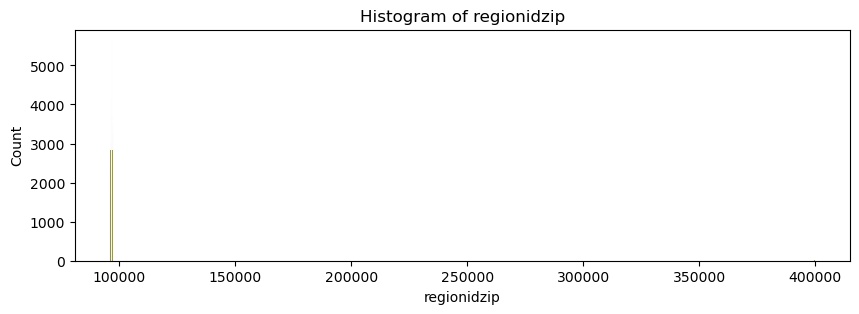

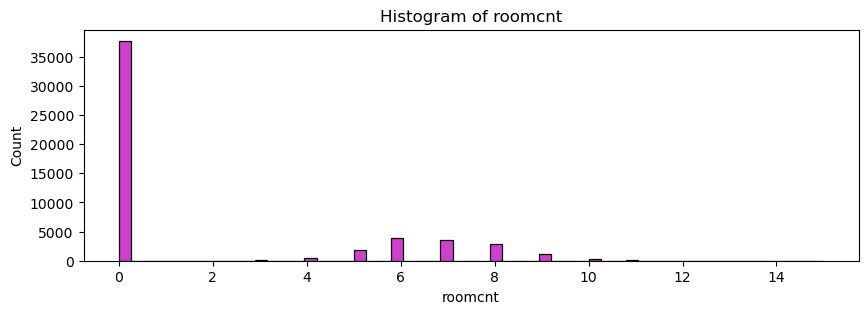

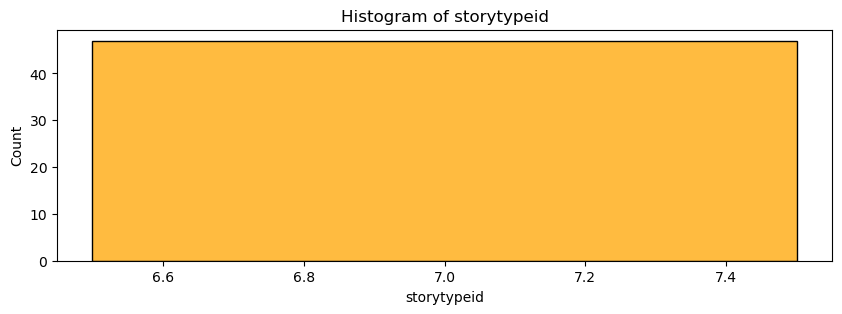

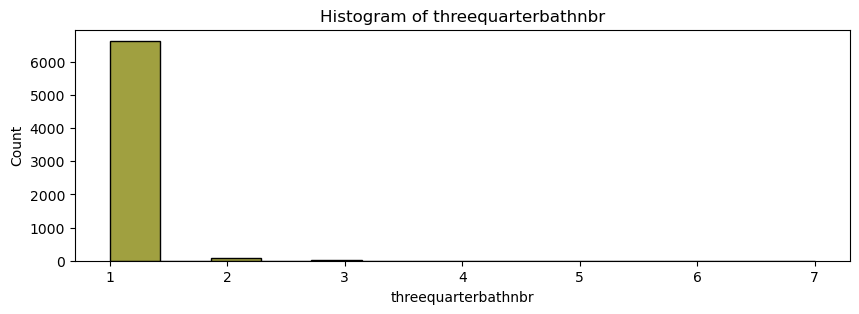

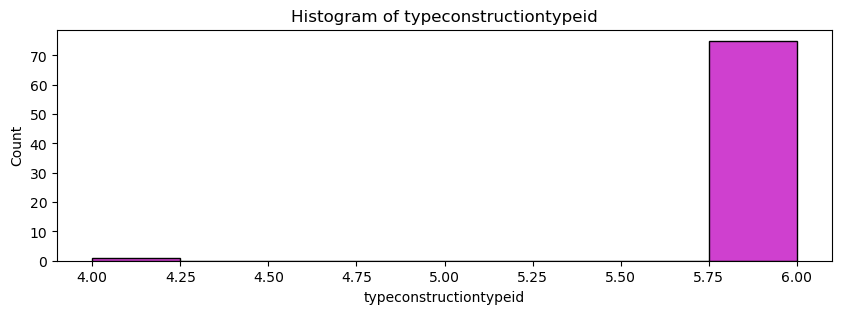

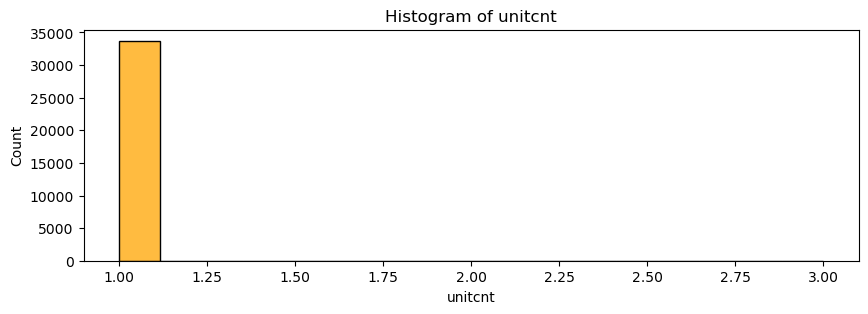

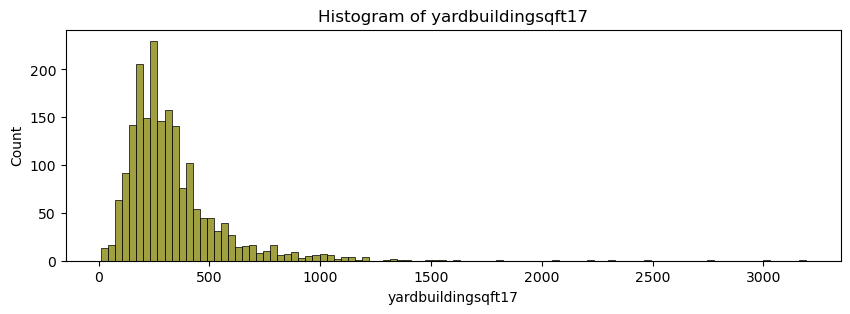

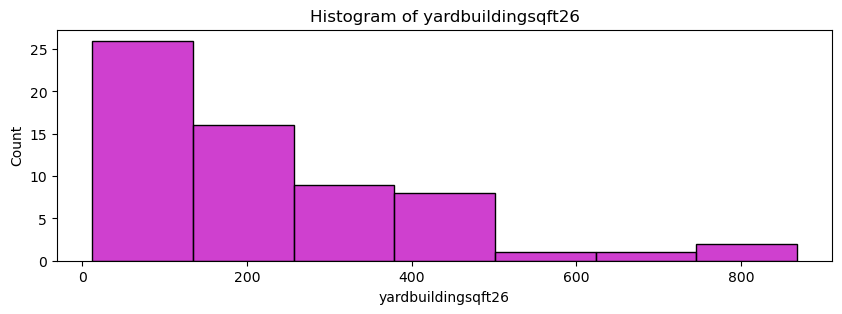

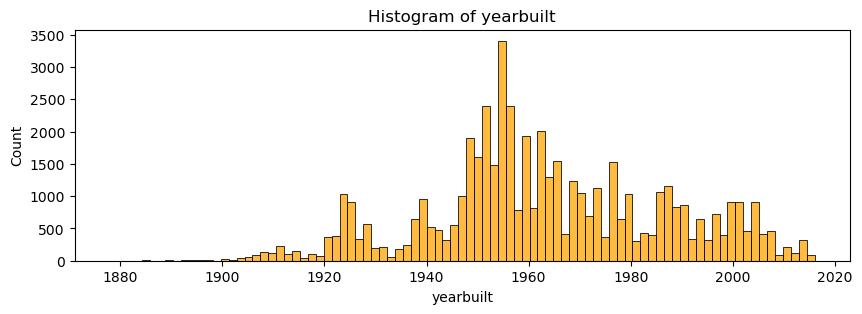

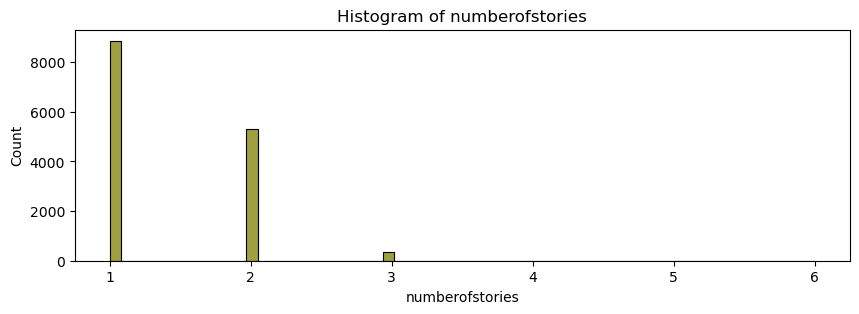

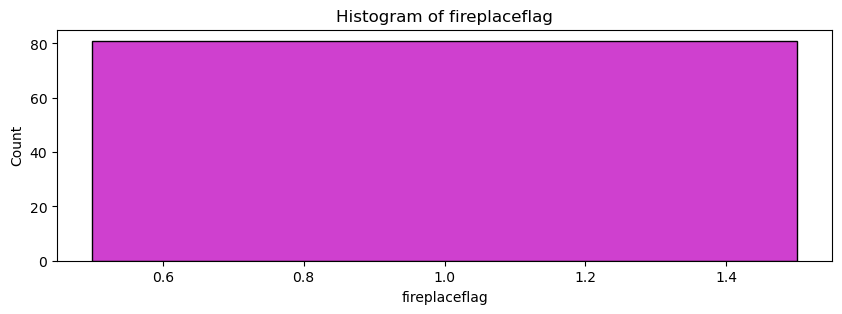

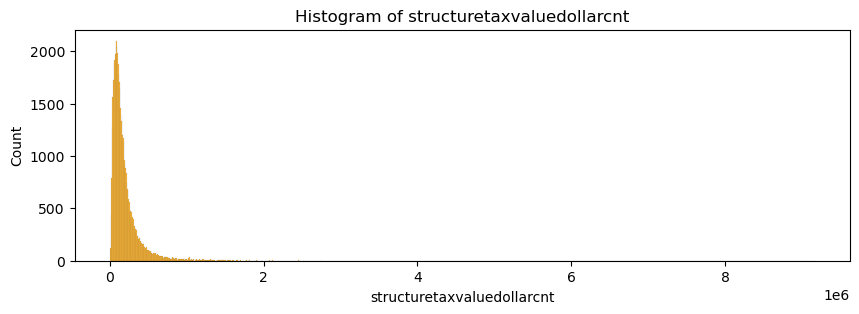

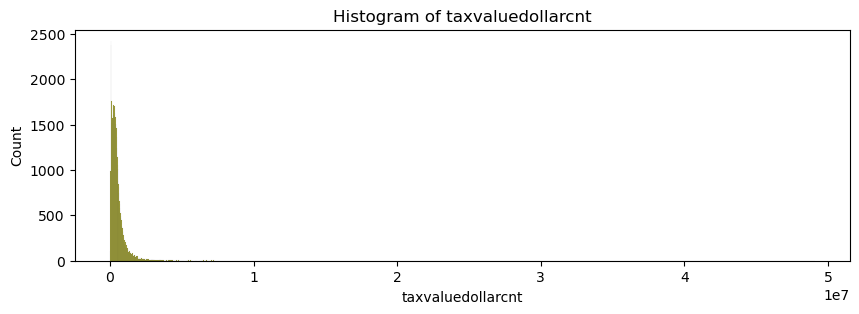

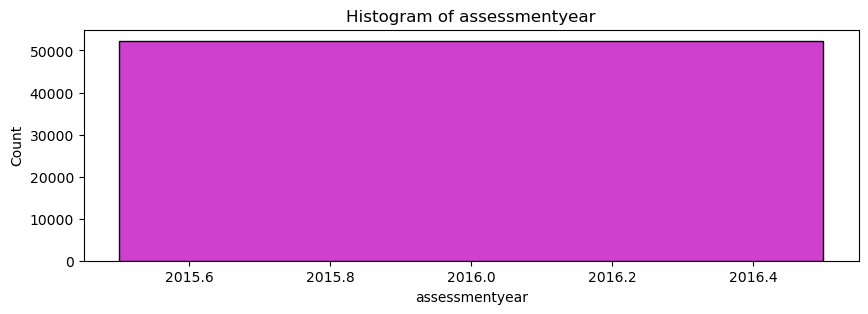

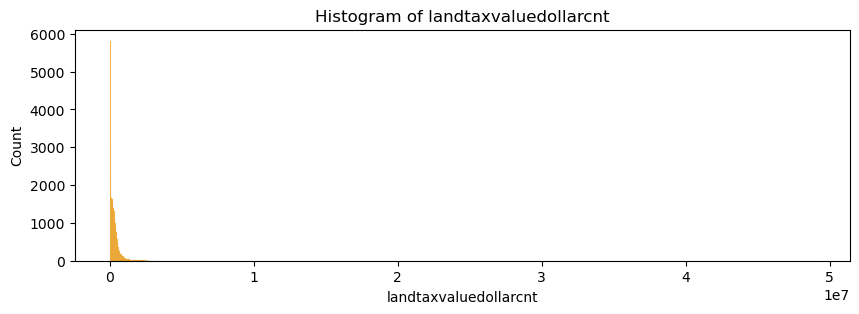

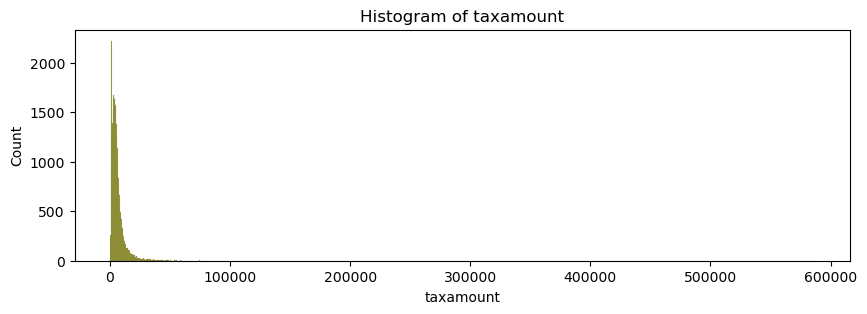

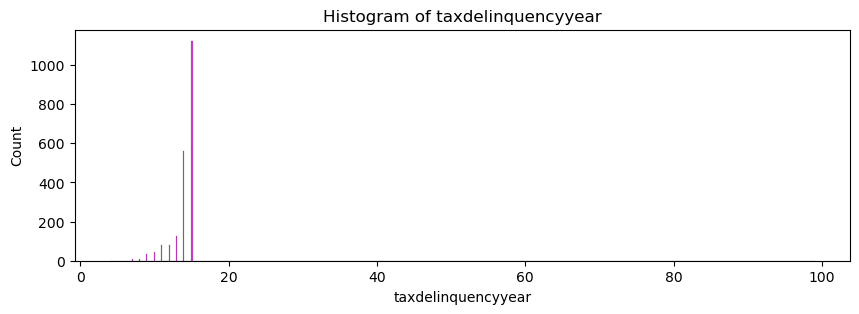

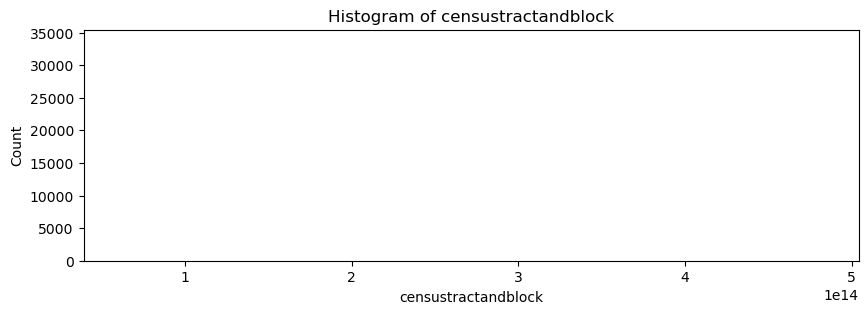

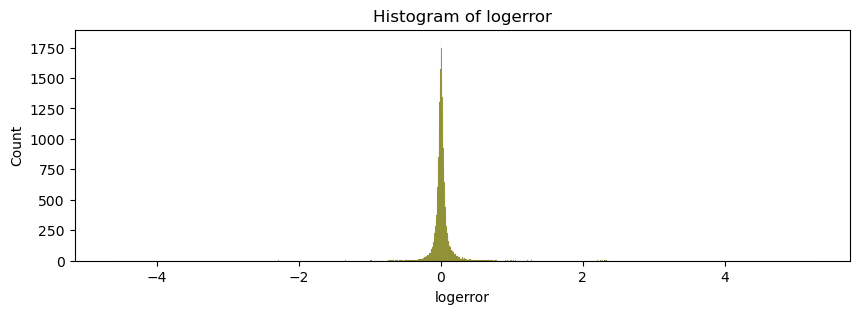

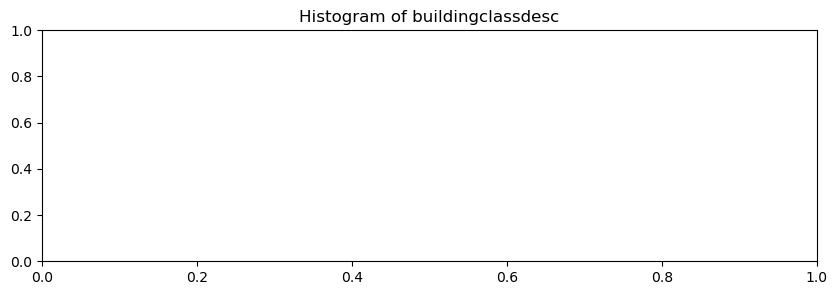

In [6]:
#Visualization:Plotting the data,histograms or box plots, can help identify outliers visually.

histograms = wz.display_numeric_column_histograms(zillow_data)

(-1.0, 1.0)

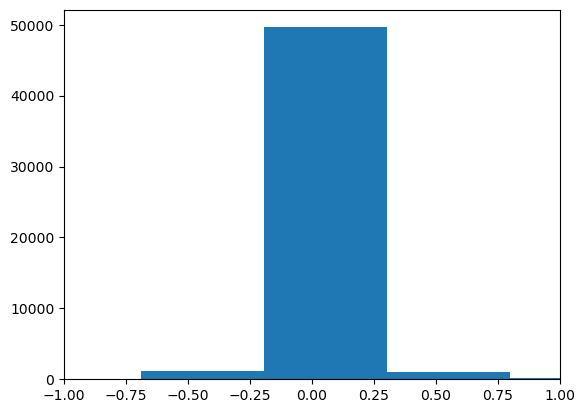

In [10]:
#Distribution of target variable
plt.hist(x=zillow_data['logerror'], bins=20)
plt.xlim(-1, 1)

In [12]:
#Value counts of the poolcnt column
zillow_data['poolcnt'].value_counts()

poolcnt
1.0    11077
Name: count, dtype: int64

# 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

The output should look like the table below:

num_rows_missing	pct_rows_missing
parcelid	0	0.000000
airconditioningtypeid	29041	0.535486
architecturalstyletypeid	54232	0.999982

In [8]:
missing_value = wz.missing_value_summary(zillow_data)
missing_value.head()

,num_rows_missing,pct_rows_missing
name,,
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,38704,0.739769
architecturalstyletypeid,52249,0.998662
basementsqft,52272,0.999102


In [9]:
missing_value.shape

(68, 2)

## Prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [11]:
#Maybe there are some houses with no square footage?
zillow_data[zillow_data['calculatedfinishedsquarefeet'] == 0]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc


In [12]:
#What about nonexistent lots?
zillow_data[zillow_data['lotsizesquarefeet'] == 0]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc


In [13]:
#Maybe ones that have no bedrooms?
zillow_data[zillow_data['bedroomcnt'] == 0]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
124,2546776,14190895,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,6.059022e+13,-0.001296,2017-01-03,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
590,2062723,11662937,NaN,NaN,NaN,5.0,0.0,NaN,10.0,5.0,...,6.037263e+13,0.015158,2017-01-05,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2602,496818,11696784,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,6.037235e+13,-0.124790,2017-06-16,NaN,NaN,NaN,Floor/Wall,Single Family Residential,NaN,NaN
2683,1602501,12227894,NaN,NaN,NaN,0.0,0.0,NaN,4.0,NaN,...,6.037241e+13,-0.024661,2017-01-19,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2887,856504,12146026,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,6.037431e+13,-0.661313,2017-01-20,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51689,1341842,11784034,1.0,NaN,NaN,1.0,0.0,NaN,NaN,1.0,...,6.037207e+13,0.025360,2017-09-14,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
52041,1759759,12399434,NaN,NaN,NaN,0.0,0.0,NaN,6.0,NaN,...,6.037551e+13,0.509534,2017-09-18,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
52053,2004419,12000984,NaN,NaN,NaN,1.0,0.0,NaN,8.0,1.0,...,6.037700e+13,-0.554524,2017-09-18,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
52266,342540,11784041,1.0,NaN,NaN,1.0,0.0,NaN,NaN,1.0,...,6.037207e+13,0.009603,2017-09-19,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


## 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The input:
A dataframe
A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
The output:
The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
hint:
Look up the dropna documentation.
You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [4]:
clean_zillow = wz.handle_missing_values(zillow_data, 0.75, 0.75)
clean_zillow.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,...,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential


In [5]:
clean_zillow.shape

(52317, 29)

In [6]:
#Save a copy of the clean csv to my local machine
clean_zillow.to_csv('zillow_cleaned.csv')


## Mall Customers

In [ ]:

Notebook

Acquire data from the customers table in the mall_customers database.
Summarize the data (include distributions and descriptive statistics).
Detect outliers using IQR.
Split data into train, validate, and test.
Encode categorical columns using a one hot encoder (pd.get_dummies).
Handles missing values.
Scaling
Encapsulate your work in a wrangle_mall.py python module.

In [24]:
#Acquire Data:

mall_data = wm.acquire_mall()
mall_data.head() 

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Summarize the data (include distributions and descriptive statistics).

In [7]:
#Summarize Data:

wrangle_mall.summarize_data(mall_data )


Shape of Data: 
(200, 5)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Descriptions:
|                |   count |   mean |     std |   min |   25% |   50% |    75% |   max |
|:---------------|--------:|-------:|--------:|------:|------:|------:|-------:|------:|
| customer_id    |     200 | 100.5  | 57.8792 |     1 | 50.75 | 100.5 | 150.25 |   200 |
| age            |     200 |  38.85 | 13.969  |    18 | 28.75 |  36   |  49    |    70 |
| annual_income  |     200 |  60.56 | 26.2647 |    15 | 41.5  |  61.5 |  78    |   137 |
| spending_score |     200 |  50.2  | 25.8

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

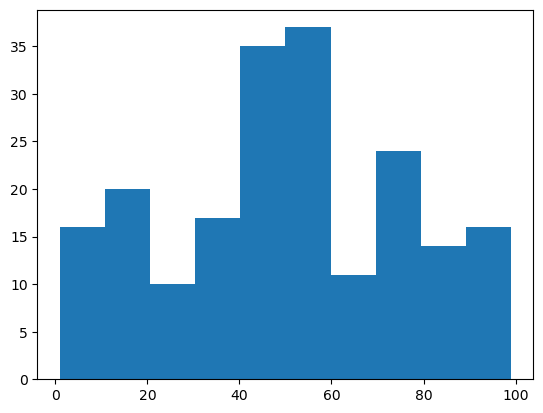

In [11]:
#Visualize distribution of target variable
plt.hist(mall_data['spending_score'])  

In [12]:
#Descriptive statistics of numerical columns
mall_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [13]:
mall_data.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

## 3. Detect outliers using IQR.

In [25]:
#See the quantiles for age
mall_data['age'].quantile([0.25, 0.75])

0.25    28.75
0.75    49.00
Name: age, dtype: float64

In [26]:
#Store the quantiles in variables
age_q1, age_q3 = mall_data['age'].quantile([0.25, 0.75])

In [27]:
#Calculate the IQR
age_iqr = age_q3 - age_q1

age_iqr

20.25

In [28]:
#Calculate upper and lower bounds based on a k value of 1.5
age_upper = age_q3 + (age_iqr * 1.5)
age_lower = age_q1 - (age_iqr * 1.5)

age_upper, age_lower


(79.375, -1.625)

In [29]:
#Check for outliers in the age column
mall_data[mall_data['age'] > age_upper]

,customer_id,gender,age,annual_income,spending_score


# After encoding categorical columns we should split data

## 5 Encode categorical columns using a one hot encoder (pd.get_dummies).

In [30]:
#Check get_dummies works as expected on my training data
pd.get_dummies(mall_data)

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


In [31]:
#Create the dataframe with dummies for gender and drop redundant column
mall_data = pd.get_dummies(mall_data)

mall_data.drop(columns=['gender_Male'], inplace=True)

mall_data.head()

,customer_id,age,annual_income,spending_score,gender_Female
0,1,19,15,39,False
1,2,21,15,81,False
2,3,20,16,6,True
3,4,23,16,77,True
4,5,31,17,40,True


## 6 Handles missing values.

In [14]:
#Check for missing values
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     200 non-null    int64
 1   age             200 non-null    int64
 2   annual_income   200 non-null    int64
 3   spending_score  200 non-null    int64
 4   gender_Female   200 non-null    bool 
dtypes: bool(1), int64(4)
memory usage: 6.6 KB


# 4 Split data into train, validate, and test.

In [32]:
#Split Data:

train, validate, test = wm.split_data(mall_data)
validate.head()

,customer_id,age,annual_income,spending_score,gender_Female
159,160,30,78,73,True
88,89,34,58,60,True
8,9,64,19,3,False
128,129,59,71,11,False
93,94,40,60,40,True


# 7 Scaling


In [33]:
#Scaling:

#train, validate, test = wm.prep_mall(df)


#Initialize the scaler and fit/transform a couple columns in my training data
mms = MinMaxScaler()

train[['age', 'annual_income']] = mms.fit_transform(train[['age','annual_income']])

train.head()

,customer_id,age,annual_income,spending_score,gender_Female
26,27,0.519231,0.106557,32,True
23,24,0.250000,0.081967,73,False
39,40,0.038462,0.180328,75,True
37,38,0.230769,0.155738,73,True
56,57,0.634615,0.237705,50,True


In [35]:
train.shape


(112, 5)